# DATA EDA 

- 메타 데이터 확인 : 메타데이터를 확인하여 데이터에 대한 전체적인 정보를 얻습니다.

- 데이터 로딩: 지문 데이터를 로딩하여 메모리에 올립니다. 이 단계에서는 지문 이미지의 크기, 형식, 구조 등을 파악합니다.

-  지문 이미지 검토: 로딩된 지문 이미지의 첫 부분과 끝 부분을 살펴보고, 이미지의 품질이나 크기 등의 이상치(outlier)가 있는지 확인합니다.

- 이미지 전처리: 이미지의 크기를 조정하거나, 노이즈를 제거하는 등의 전처리 작업을 수행합니다. 또한, 지문 이미지에서는 매칭 알고리즘을 사용하기 위해 미세한 변형이나 회전, 스케일링 등의 기하학적 변환도 수행됩니다.

-  이미지 시각화: 이미지를 시각화하여 데이터의 분포, 이상치, 상관관계 등을 파악합니다. Matplotlib, OpenCV, scikit-image 등의 이미지 라이브러리를 사용합니다.

-  지문 이미지 특징 추출: 지문 이미지의 특징을 추출하여 매칭 알고리즘을 사용해 지문 인식을 수행합니다. 대표적으로는 SIFT, SURF, HOG, CNN 등의 알고리즘이 사용됩니다.

-  결론 도출: 데이터 EDA를 통해 얻은 정보를 바탕으로, 문제 해결을 위한 가설을 수립하거나 데이터 전처리, 모델링 등의 방향성을 제시합니다. 지문 인식의 경우, 인식률을 높이기 위한 데이터 전처리 방법이나 매칭 알고리즘 등을 개선하는 방향으로 문제를 해결합니다.

-  이러한 지문 데이터 EDA 과정을 통해 지문 데이터의 특성을 파악하고 문제점을 발견하여 데이터의 품질을 개선하거나 모델의 성능을 향상시키는 데 도움이 됩니다.


## 메타데이터 확인



- 소코핑 데이터 세트에는 600명의 아프리카 피험자에 속하는 6,000개의 지문이 포함
- 피험자 한 명당 지문이 10개이고 모든 피험자가 18세 이상입니다. 데이터셋에는 성별, 손 및 손가락 이름 레이블과 같은 고유 속성이 포함되어 있습니다. 
- 추가로 지문을 합성으로 STRANGY Tool을 사용하여 obliteration, central rotation,  z-cut 세 가지 다른 noise 데이터가 추가됨

=> **분류를 위한 benchmark로서 활용을 하기 위한 것같다.**


### Data count 
- Total Count=55,270   
- gt_iamges count : 6000 easy_images count :17931 medium_images count : 17067 hard_images count : 14272  
- total :  55270  
왜 굳이 이렇게 altered 한지는 모르겠다.. 

### data size
width = 96, height = 103 chnnel = 1 (grayscale)

### altered 
- obliteration 
Fingerprint 분야에서 "obliteration"은 지문 이미지를 완전히 손상시키는 기술을 의미합니다. 이 기술은 지문 보안 및 개인 정보 보호를 위해 사용될 수 있습니다. 지문 이미지를 완전히 지우거나 지문의 미세한 세부 사항을 모두 제거하여 해독을 방지할 수 있습니다. Obliteration 기술은 지문 인식 기술 개발 및 성능 평가에 중요한 역할을 합니다.
- central rotation 
Fingerprint 분야에서 "central rotation"은 지문 이미지를 회전시키는 기술을 의미합니다. 이 기술은 지문 이미지의 방향성을 변경하여 지문 인식 성능을 향상시키는 데 사용됩니다. Central rotation은 지문 이미지의 회전 각도를 중심 축 주변으로 변경하므로써 지문 이미지의 정보를 유지한 채로 지문 인식 기술의 성능을 개선할 수 있습니다. 이 기술은 지문 이미지의 회전 변형을 인식하는 능력을 강화하는 데 도움이 됩니다. 따라서 central rotation은 지문 인식 기술에서 중요한 역할을 합니다.
- z-cut 
Fingerprint 분야에서 "z-cut"은 지문 이미지에서 일부분을 잘라내는 기술을 의미합니다. 이 기술은 지문 이미지의 일부를 제거하여 지문 인식의 성능을 평가하고 개선하는 데 사용됩니다. Z-cut 기술은 지문 이미지에서 지문 끝부분을 제거하여 지문 인식의 정확도를 높이는 데 도움이 됩니다. 지문 이미지에서 양 끝의 일부를 제거함으로써 지문 이미지의 일부 변형을 인식하는 능력을 강화합니다. 따라서 z-cut은 지문 인식 기술에서 중요한 역할을 합니다.


### 이미지 구분방법 

1. Identifies the number of the subject: 001 to 600.
2. Indicates the gender of the subject: M – male, F – female.
3. Denotes the hand: Left or Right.
4. Indicates the finger name: little, ring, middle, index, or thumb.
5. Indicates the type of alteration type (altered images only): Obl – obliteration, CR – central rotation, or Zcut.
6. File extension: “.bmp” for all images. 


## Data Load 및 이미지 검토와 전처리 

#### Data Load 및 개수확인

In [1]:
import os 
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt
import natsort
import numpy as np
import sys
%matplotlib inline

In [2]:
#Data path 
#gt path
gt_path1= './data/SOCOFing/Real/'
gt_path2  ='./data/socofing/SOCOFing/Real/'


gt_file_path1=[gt_path1+i for i in os.listdir(gt_path1)]
gt_file_path2=[gt_path2+i for i in os.listdir(gt_path2)]
gt_file_path = gt_file_path1 #밑에 보면 알지만 위의 파일들의 차이가 없기 떄문에 하나의 경로로 묶어준다.

#natsort는 문자열을 sort할때 사용하는 라이브러리!
#두 데이터의 비교를 위하여 sort해줌
gt_file_path1 = natsort.natsorted(gt_file_path1)
gt_file_path2 = natsort.natsorted(gt_file_path2)


#altered path 
altered_path = "./data/socofing/SOCOFing/Altered/"
img_type = ["Altered-Easy","Altered-Medium","Altered-Hard"]
noise_type= ["obliteration", "central_rotation","z-cut"]

altered_easy_path = [os.path.join(altered_path,img_type[0],i) for i in (os.listdir(altered_path+img_type[0]))]
altered_medium_path = [os.path.join(altered_path,img_type[1],i) for i in (os.listdir(altered_path+img_type[1]))]
altered_hard_path = [os.path.join(altered_path,img_type[2],i) for i in (os.listdir(altered_path+img_type[2]))]


In [3]:
gt_images_count = len(gt_file_path)
easy_images_count = len(altered_easy_path)
medium_images_count = len(altered_medium_path)
hard_images_count = len(altered_hard_path)
total = gt_images_count+easy_images_count+medium_images_count+hard_images_count
print('gt_iamges count : {} easy_images count :{} medium_images count : {} hard_images count : {}'.format( gt_images_count,easy_images_count,medium_images_count,hard_images_count))
print('total : ', total)

gt_iamges count : 6000 easy_images count :17931 medium_images count : 17067 hard_images count : 14272
total :  55270


#### 같은 파일이 2개씩 들어가 있었고, 논문을 봐도 이에 대한 내용이 없어서 비교를 해봄

In [4]:
gt_file1_test = [cv2.imread(i,cv2.IMREAD_GRAYSCALE) for i in gt_file_path1[:10]]
gt_file2_test = [cv2.imread(i,cv2.IMREAD_GRAYSCALE) for i in gt_file_path2[:10]]

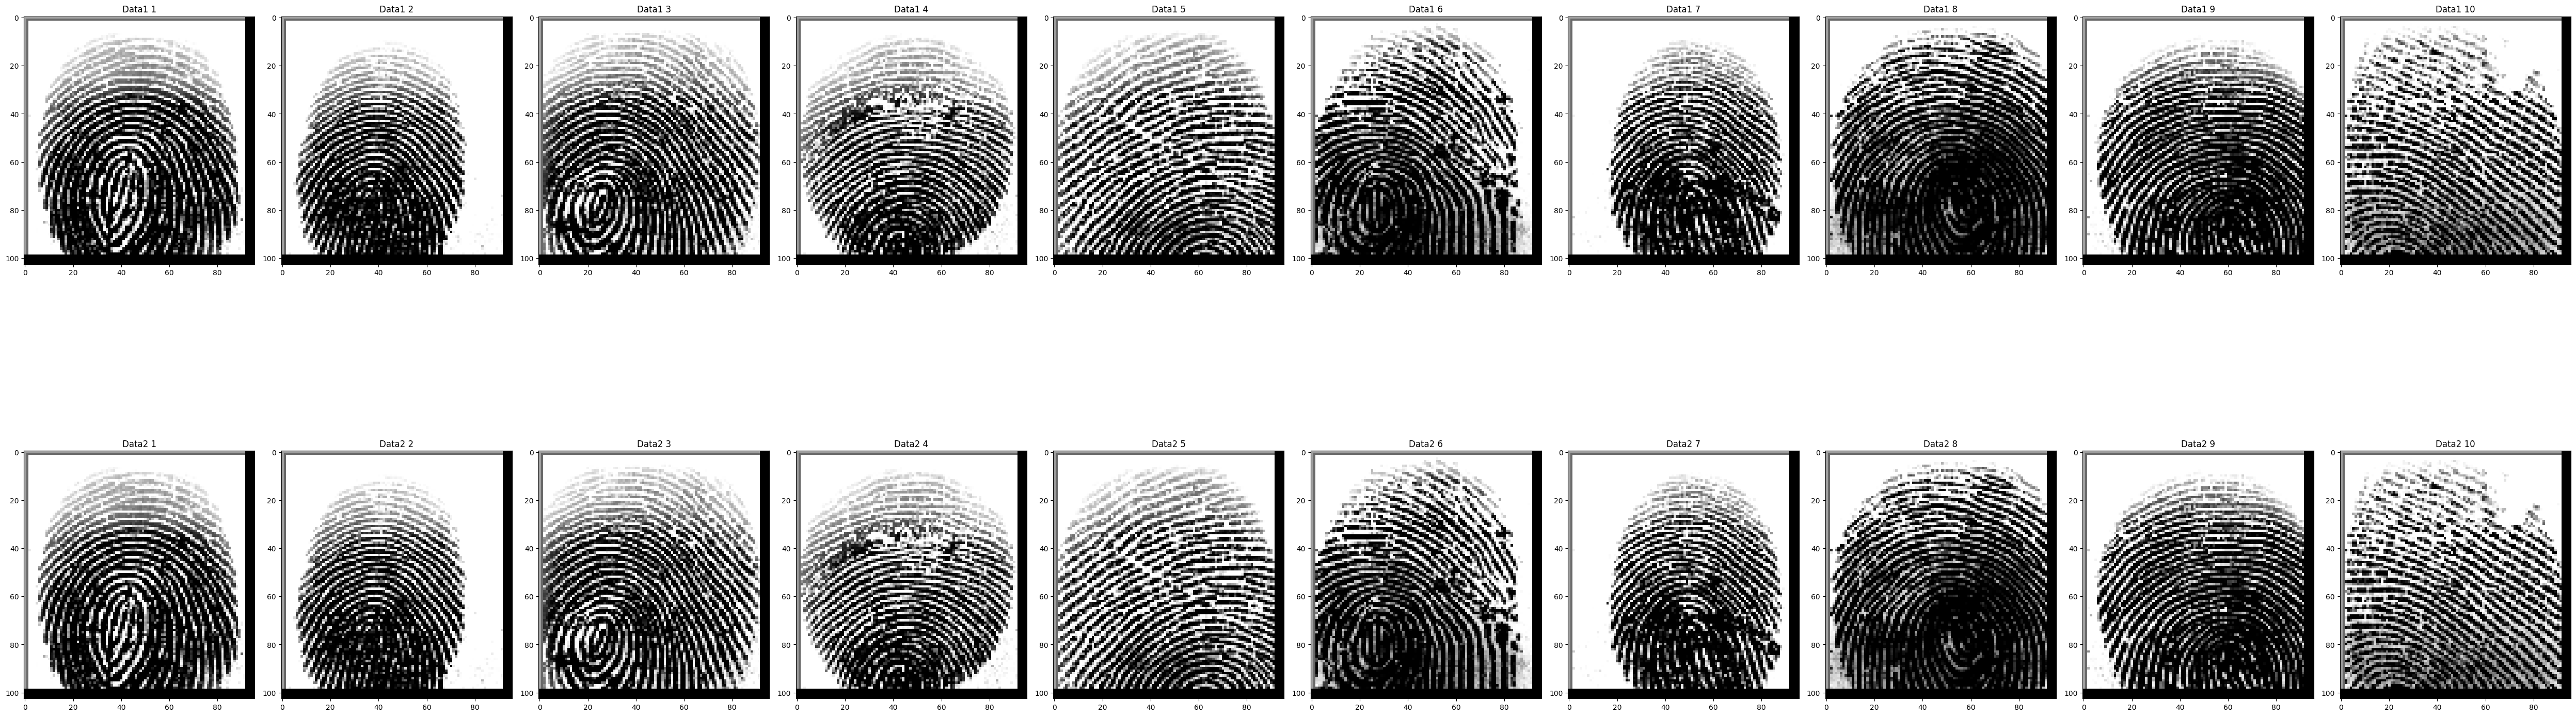

In [5]:

fig, axes = plt.subplots(2,10,figsize=(50,20))

for i, data in enumerate(gt_file1_test):
    axes[0][i].imshow(data,cmap='gray')
    axes[0][i].set_title(f'Data1 {i+1}')
for i, data in enumerate(gt_file2_test):
    axes[1][i].imshow(data,cmap='gray')
    axes[1][i].set_title(f'Data2 {i+1}')
    
plt.tight_layout()
plt.show()

In [6]:
#2개의 파일 비교
print((gt_file1_test[1] == gt_file2_test[1]).any(),(gt_file1_test[0] == gt_file2_test[0]).any()) #왜 같은거 두개 넣었지..?
print(len(gt_file_path1) , len(gt_file_path2))

True True
6000 6000



?? 보다 보니 밑에 4x4로 패딩되어진 부분이 있는데 다 논문과 다른 페이지에도 설명이 없었다. 아마 지문을 입력하는 과정에서 생긴 padding같기에 지워줬다.   
또한 같은 파일을 두개 넣은것으로 보아하니 논문데이터라 하더라도 그냥 믿으면 안되겠다라는 생각이 여실히 들었다.

In [7]:
#필요없는 패딩을 없애고 데이터 불러오기
gt_images= [cv2.imread(path,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for path in gt_file_path]

altered_easy_images=  [cv2.imread(path,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for path in altered_easy_path]
altered_medium_images=  [cv2.imread(path,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for path in altered_medium_path]
altered_hard_images=  [cv2.imread(path,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for path in altered_hard_path]

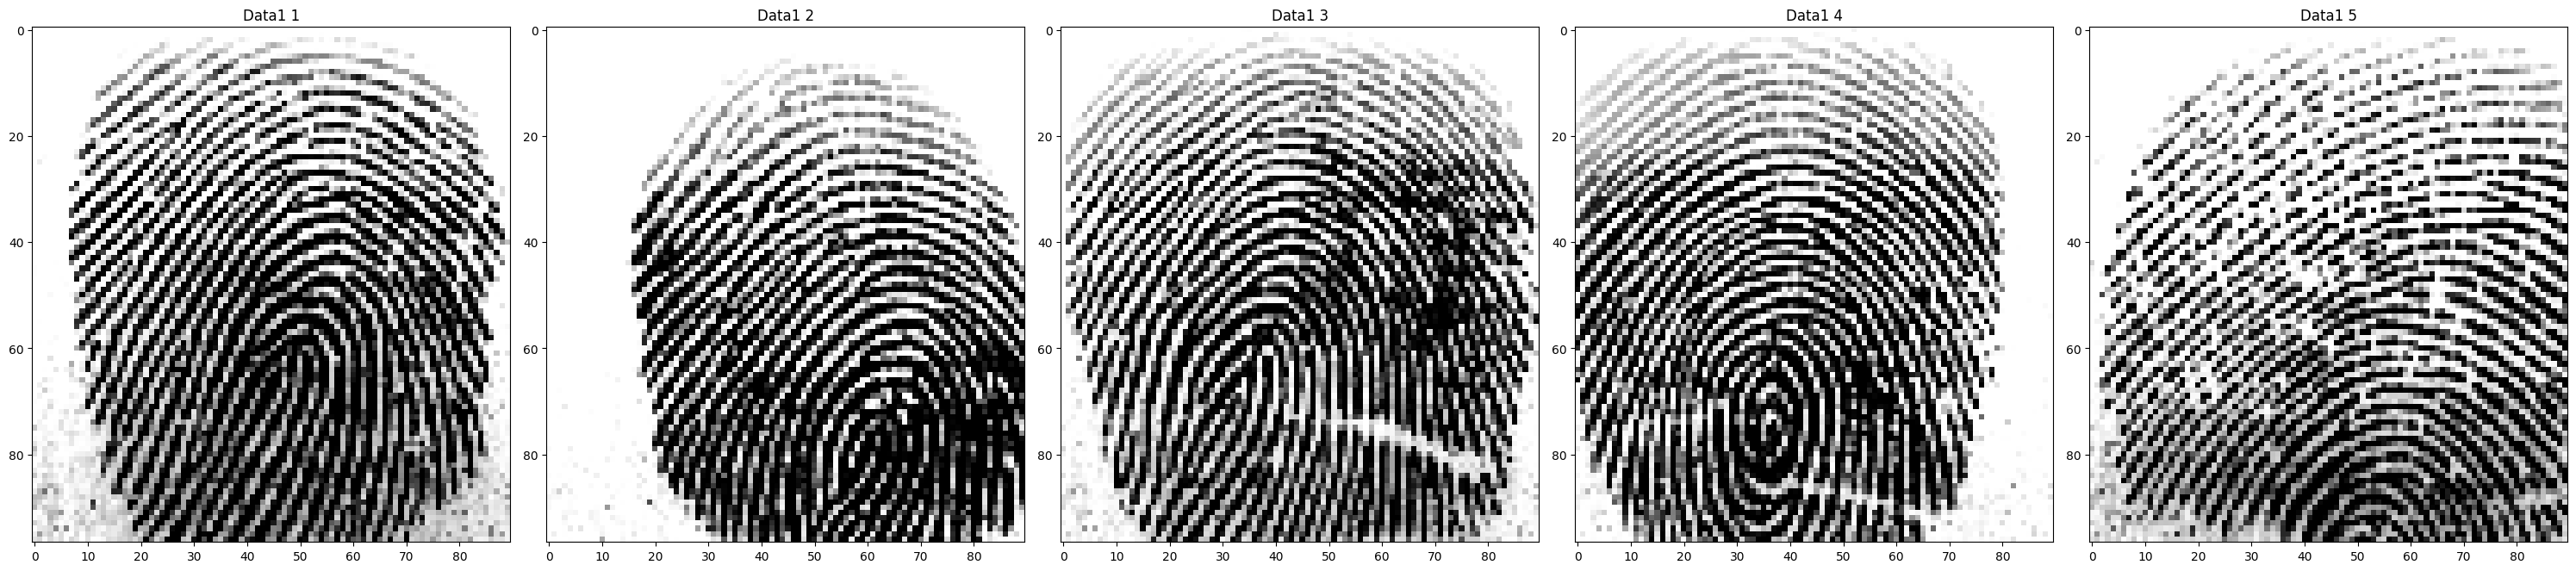

In [8]:

fig, axes = plt.subplots(1,5,figsize=(30,20))

for i, data in enumerate(gt_images[:5]):
    axes[i].imshow(data,cmap='gray')
    axes[i].set_title(f'Data1 {i+1}')

    
plt.tight_layout()
plt.show()

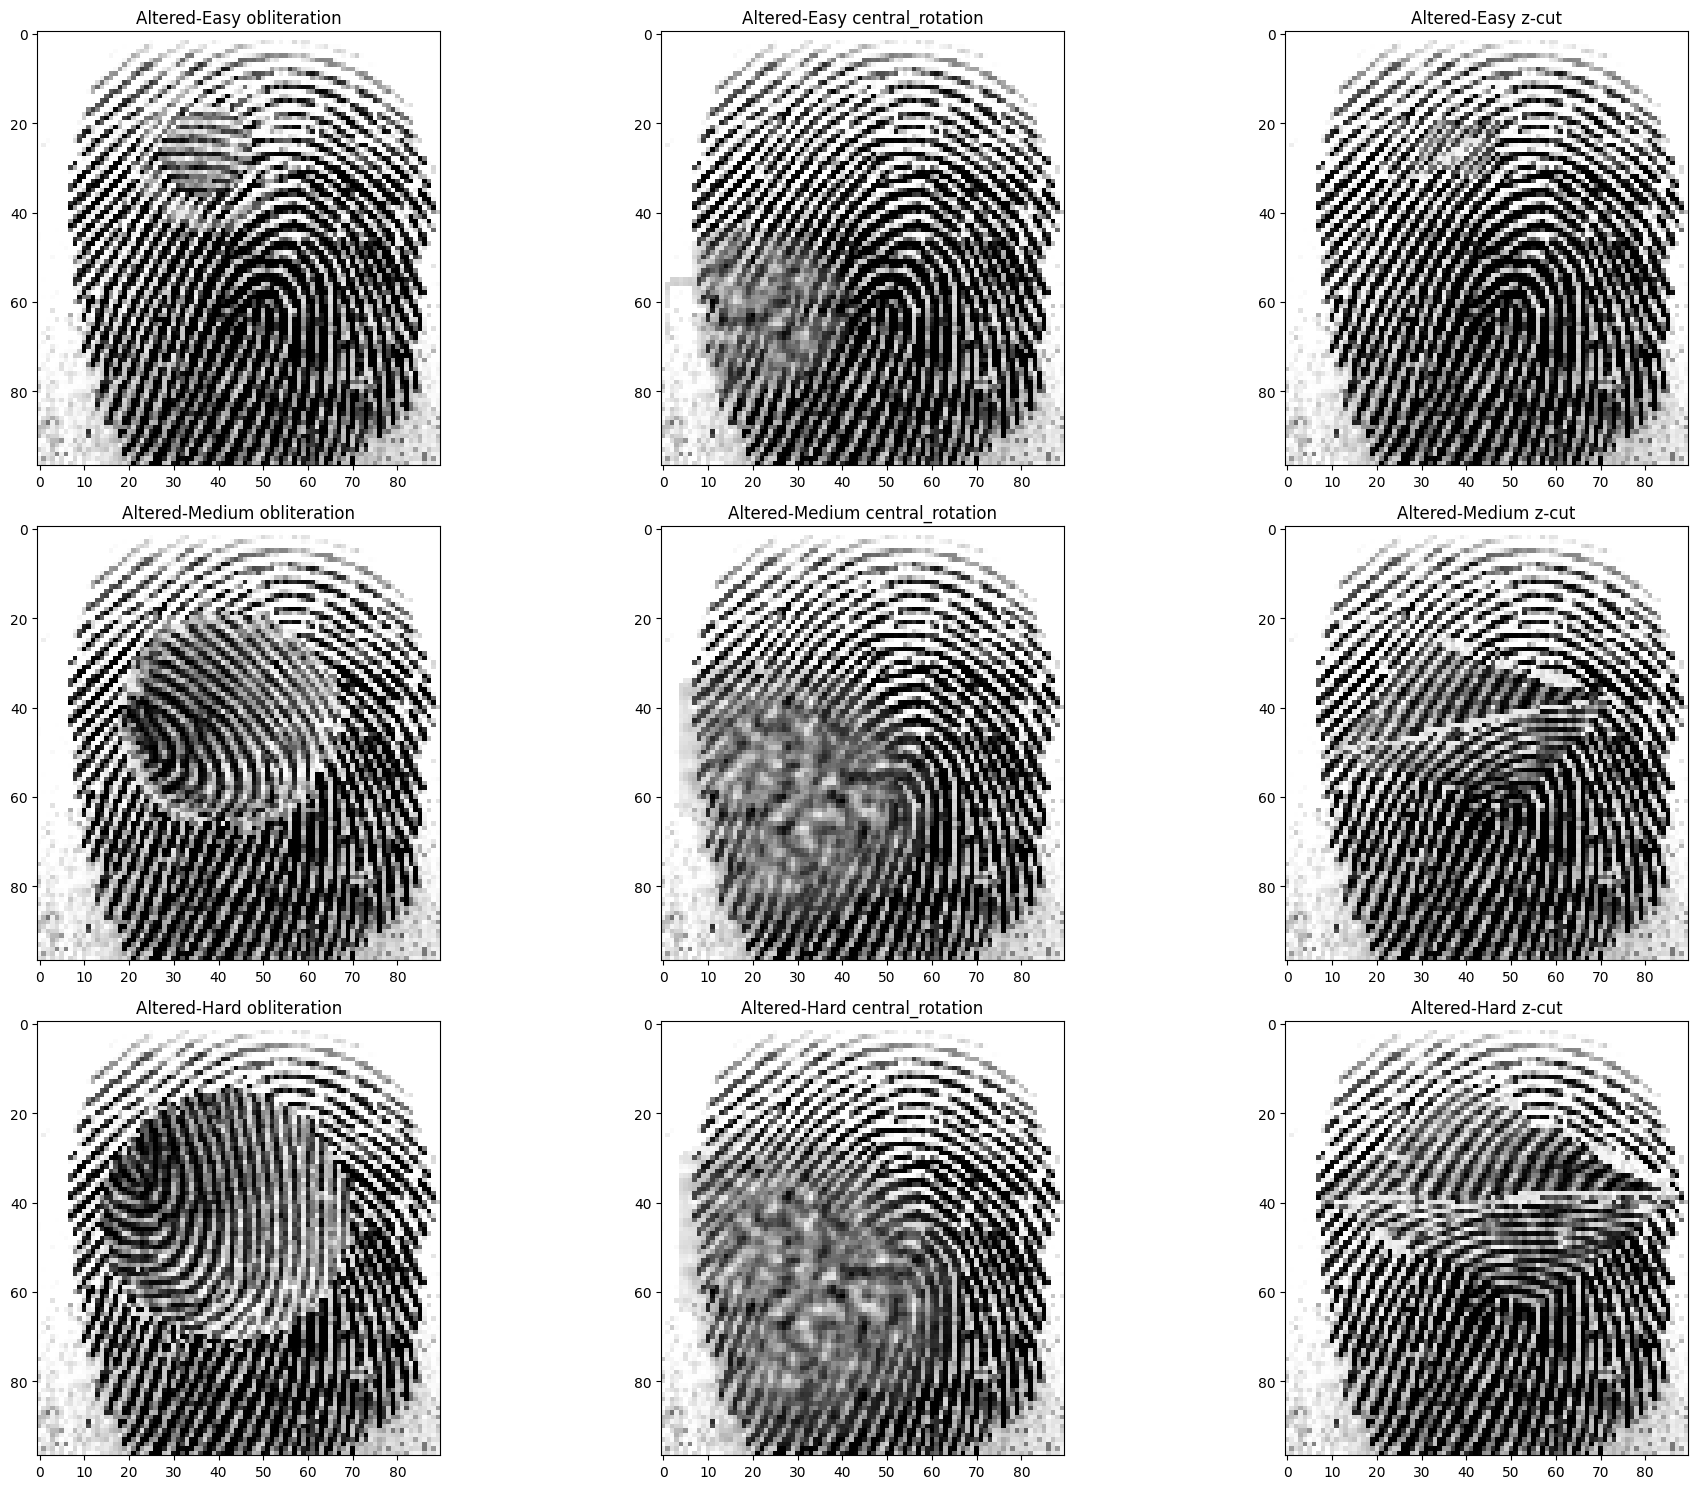

In [9]:
fig, axes = plt.subplots(3,3,figsize=(20,15))

for i, data in enumerate(zip(altered_easy_images[:3],altered_medium_images[:3],altered_hard_images[:3])):
    axes[0][i].imshow(data[0],cmap='gray')
    axes[0][i].set_title(img_type[0]+' '+noise_type[i])
    axes[1][i].imshow(data[1],cmap='gray')
    axes[1][i].set_title(img_type[1]+' '+noise_type[i])
    axes[2][i].imshow(data[2],cmap='gray')
    axes[2][i].set_title(img_type[2]+' '+noise_type[i])

plt.tight_layout()

- 필요없는 부분은 날리고 깔끔해진 모습 
- Altered된 모습이 정확히 어떻게 되어있는지를 알 수 있었다. altered와 orginal fingerprint의 특징추출을 하여 최대한 정확도를 높여보자!

#### Histogram으로 이미지 픽셀 정보의 특이점이 있는지 확인

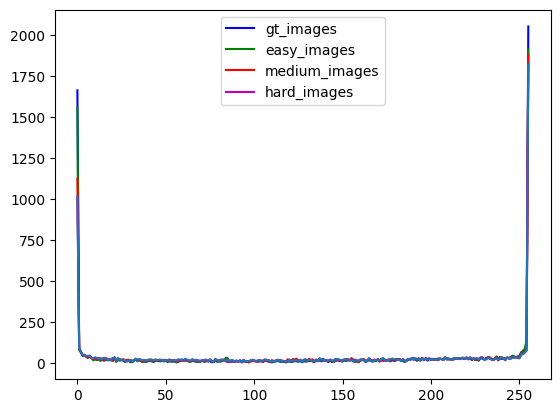

In [9]:
# Histogram 분석

# 그레이스케일 영상의 히스토그램

total_images = [gt_images,altered_easy_images,altered_medium_images,altered_hard_images]
c_names = ['b','g','r','m'] 
labels = ["gt_images","easy_images","medium_images","hard_images"]

for (p, name,label) in zip(total_images,c_names ,labels):
    hist = cv2.calcHist(p, [0], None, [256], [0, 256]) #calchist는 이미지를 리스트로도 받아줘서 좋음 :) matplotlib의 hist는 못받아주고 심지어  1차원배열만 받음
    plt.plot(hist, color=name,label=label)

plt.legend() # 범주 추가 까먹지말자하
plt.plot(hist)
plt.show()


- Binomal한 이미지이다.
- 0과 1로 거의 확실히 구분되어져서 노이즈가 거의 없다.
- OTSU로 전역 이진화를 해도 될 것 같지만 그래도 지역 이진화 중 효과가 좋은 Sauvola threath hold 기법도 써서 비교를 해보자

#### OTSU 전역 이진화 

otsu's threshold: 138.0


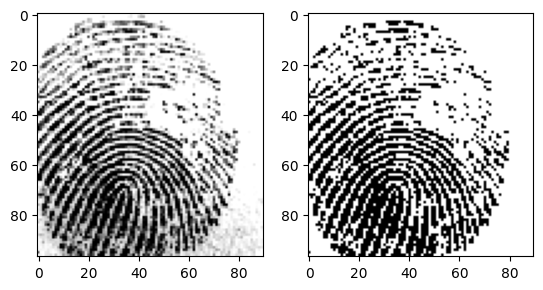

In [10]:

src = gt_images[20]

if src is None:
    print('Image load failed!')
    sys.exit()

th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu's threshold:", th)  # 131

fig, axes = plt.subplots(1,2)
axes[0].imshow(src,cmap='gray')
axes[0].set_title = 'src'
axes[1].imshow(dst,cmap='gray')
axes[1].set_title = 'dst'


#### Sauvola threath hold 전역 이진화

- 사용이유     
Sauvola thresholding 알고리즘에서 보정 상수는 이미지의 밝기에 따른 적응 임계치(threshold)를 계산하는 과정에서 사용됩니다. 이 보정 상수는 임계치를 조정하여 선명하고 깔끔한 이진 이미지를 얻기 위해 사용됩니다.

-  지역 이진화
Sauvola 알고리즘은 이미지의 각 픽셀마다 임계치를 계산합니다. 임계치는 해당 픽셀과 주변 픽셀의 밝기값에 따라 계산되며, 보정 상수는 이 계산에서 사용됩니다. 보정 상수는 이웃 픽셀의 밝기 값이 서로 비슷한 경우에는 임계치를 낮추고, 그렇지 않은 경우에는 임계치를 높이는 역할을 합니다.

구체적으로는, Sauvola 알고리즘에서 특정 픽셀의 임계치는 해당 픽셀과 이웃한 픽셀들의 밝기값의 평균(m)과 표준편차(s)를 사용하여 다음과 같이 계산됩니다.

T(x,y) = m(x,y) * (1 + k * ((s(x,y)/R) - 1))


여기서 k는 보정 상수이며, R은 이미지의 밝기 범위를 결정하는 최대 밝기값과 최소 밝기값의 차이입니다. 이 식에서 s/R이 1보다 큰 경우 보정 상수 k는 양수가 되어 임계치가 증가하고, s/R이 1보다 작은 경우 k는 음수가 되어 임계치가 감소합니다.
- 보정상수의 추가 이유 

보정 상수를 추가하는 이유는 Sauvola 알고리즘이 특정 상황에서 잘 동작하지 않을 수 있기 때문입니다. 보정 상수를 추가함으로써 성능을 향상시킬 수 있습니다. 하지만 이 값은 일반적으로 수동으로 조정해야 하며, 최적의 값은 이미지와 애플리케이션에 따라 다를 수 있습니다.
- Sauvola 이진화에서 window의 크기는 선택한 이미지에 따라 다르며, 일반적으로 이미지 크기와 특성에 따라 결정됩니다.

- 일반적으로 window 크기가 너무 작으면 지역적인 특성을 고려하지 못해 지역 임계값이 일관되지 않아 이진화 결과가 좋지 않을 수 있습니다. 반면, window 크기가 너무 크면 전체 영역을 대표하는 임계값을 구하기 때문에 지역적인 차이를 반영하지 못해 이진화 결과가 전체적으로 일관성이 없을 수 있습니다.

- 일반적으로는 15x15, 20x20, 30x30 등의 window size가 많이 사용됩니다. 또한, window size를 정하는 것이 중요하지만 k, r 등의 파라미터 설정도 중요하며, 이들 값은 window size와 함께 실험적으로 결정해야합니다. 따라서, 적절한 window size와 파라미터 설정을 위해서는 실험적인 방법을 사용하여 최적의 값을 찾는 것이 좋다고한다.


In [11]:
#reffrence https://craftofcoding.wordpress.com/2021/10/06/thresholding-algorithms-sauvola-local/
#패딩공식은 없어 내가 추가하였음.. ㅜ

#어차피 같은 이미지 사이즈이기 때문에 이 함수는 한번만 쓰면된다.
def cal_samepadding_size(image:np.array,window_size=10) :
    height, width = image.shape
    pad_w = int(((width- 1) * 1 + window_size - width) / 2)
    pad_h = int(((height- 1) * 1 + window_size - height) / 2)
    return pad_w,pad_h



def sauvola_threshold(image, window_size=10, k=0.4, r=128,pad_w=4,pad_h=4):
    # 이미지를 그레이 스케일로 변환
    #k는 contrast를 위한 파라메타
    #k는 contrast(대비)에 대한 가중치입니다. k 값이 높을수록 이미지 전체에 대한 threshold 값이 높아지므로, 이진화 결과에서 흰색 픽셀의 개수가 적어집니다. 일반적으로 0.2 ~ 0.5 사이의 값이 사용됩니다.
    #r은 표준편차를 정규화하기 위한 값으로, 이미지 밝기에 따라 달라질 수 있습니다. r 값이 클수록, 이미지의 밝기 범위가 넓어지므로 threshold 값이 커지고, 이진화 결과에서 흰색 픽셀의 개수가 감소합니다. 일반적으로 128의 값을 사용합니다.
    
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    #이미지 패딩 윈도우 때문에 없어지는 픽셀 고려 패딩은 흰색으로 함
    gray= np.pad(gray, (pad_w,pad_h), mode='constant', constant_values=255)   
    
    
    # 이미지를 float 형으로 변환
    gray = np.float32(gray)

    # 이미지의 가로, 세로 크기를 구합니다.
    height, width = gray.shape

    # 결과 이미지를 저장할 배열을 생성합니다.
    result = np.zeros((height, width), dtype=np.uint8)

    # 이미지의 각 픽셀에 대해 sauvola thresholding 수행
    for h in range(pad_h, height - pad_h):
        for w in range(pad_w, width - pad_w):
            # 윈도우 영역 설정
            # window 영역이 넘어서는 범위까지 계산하면 안
            roi = gray[h-pad_h:h + window_size + 1, w-pad_w:w + window_size] #윈도우 크기만큼 범위설정 
            # mean과 std 계산
            mean = np.mean(roi)
            std = np.std(roi)

            # threshold 계산
            threshold = mean * (1 + k * ((std / r) - 1))
            # 결과 이미지에 threshold 적용
            if gray[h, w] > threshold:
                result[h, w] = 255
            else:
                result[h, w] = 0
    #padding된 부분 잘라주기

    result= result[pad_h:-pad_h,pad_w:-pad_w]
    return result.astype(np.uint8)

In [12]:
#SamePadding = ((W - 1) * S + F - W) / 2
#same padding  ((출력 크기(output size) - 1) x 스트라이드(stride) - 입력 크기(input size) + 필터 크기(filter size)) / 2
   #1.윈도우 사이즈로 이미지 width와 height의 나머지를 구한다(지금 내 경우는 이미지사이즈가 고정이기 때문에 이 계산을 굳이 안해줘도 됨으로 상수로 넣기로함)
    #2.양옆밑을 반반씩 넣어주기로함(손실을 최소화 하기 위해서)
    # height, width = gray.shape
    # pad_w = int(((width- 1) * 1 + window_size - width) / 2)
    # pad_h = int(((height- 1) * 1 + window_size - height) / 2)
def cal_samepadding_size(image:np.array,window_size=10) :
    height, width = image.shape
    pad_w = int(((width- 1) * 1 + window_size - width) / 2)
    pad_h = int(((height- 1) * 1 + window_size - height) / 2)
    return pad_w,pad_h

cal_samepadding_size(gt_images[0],window_size=10)

(4, 4)

same padding을 하기 위한 공식은 다음과 같습니다:

출력 크기(output size) = (입력 크기(input size) + 2 x 패딩(padding) - 필터 크기(filter size)) / 스트라이드(stride) + 1
여기서 same padding은 입력과 출력의 크기가 동일하게 유지되도록 입력 주변에 패딩을 추가하는 기법입니다. 따라서 출력 크기를 입력 크기와 같게 설정하고, 필터 크기와 스트라이드를 고려하여 필요한 패딩 크기를 계산할 수 있습니다. 이를 위해 다음과 같은 공식을 사용할 수 있습니다:

패딩(padding) = ((출력 크기(output size) - 1) x 스트라이드(stride) - 입력 크기(input size) + 필터 크기(filter size)) / 2
이 공식은 출력 크기를 입력 크기와 같게 유지하기 위해 필요한 패딩 크기를 계산하는 방법을 보여줍니다. 패딩 크기는 출력 크기, 입력 크기, 필터 크기, 스트라이드 값에 따라 결정되므로, 이를 고려하여 적절한 값을 계산해야 합니다.





(97, 90) (97, 90)


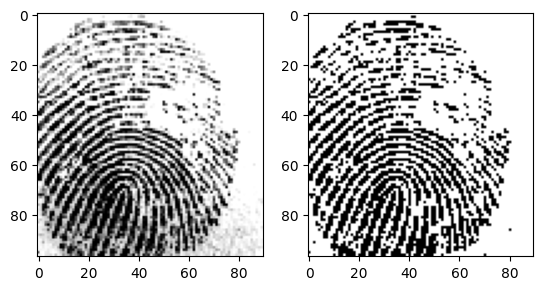

In [13]:
sauvola_output = sauvola_threshold(src)
print(sauvola_output.shape,src.shape)
fig, axes = plt.subplots(1,2)
axes[0].imshow(src,cmap='gray')
axes[0].set_title = 'src'
axes[1].imshow(sauvola_output,cmap='gray')
axes[1].set_title = 'dst'

전체 데이터를 다 이진화해서 비교해보자!


In [14]:
def otsu_binarization(img):
    src = img
    th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return dst

In [15]:
sauvola_path ='E:/study_opencv/fingerprint/preprocess_img/sauvola'
otsu_file_path = 'E:/study_opencv/fingerprint/preprocess_img/otsu/'

#### 데이터 Write

In [18]:
#gt_file_path = ''./data/SOCOFing/Real/100__M_Left_index_finger.BMP'
#altered_file_path './data/socofing/SOCOFing/Altered/Altered-Hard\\100__M_Left_index_finger_CR.BMP'

for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(otsu_file_path,'gt',gt_name.split('/')[-1]),otsu_binarization(gt))
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    cv2.imwrite(os.path.join(otsu_file_path,'medium',easy_name.split('\\')[-1]),otsu_binarization(medium),)
    cv2.imwrite(os.path.join(otsu_file_path,'hard',easy_name.split('\\')[-1]),otsu_binarization(hard))




KeyboardInterrupt: 

In [ ]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'medium',medium_name.split('\\')[-1]),otsu_binarization(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'hard',hard_name.split('\\')[-1]),otsu_binarization(hard))
       

In [91]:


for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(sauvola_path,'gt',gt_name.split('/')[-1]),sauvola_threshold(gt))
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    cv2.imwrite(os.path.join(sauvola_path,'medium',easy_name.split('\\')[-1]),sauvola_threshold(medium),)
    cv2.imwrite(os.path.join(sauvola_path,'hard',easy_name.split('\\')[-1]),sauvola_threshold(hard))

In [93]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'medium',medium_name.split('\\')[-1]),sauvola_threshold(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'hard',hard_name.split('\\')[-1]),sauvola_threshold(hard))

속도면에서는 otsu가 sauvola보다 빠르다 일단은 아마 이미 구현된 opencv함수가 c++로 짜져있기 때문일 수도 있고, 내가 padding을 추가했기에 생긴 일수있음 어차피 이미지의 크기가 동일하기 때문에 한번계산했으면 됐다. 일단은 비교를 위해 히스토그램으로 0이 더많은가 비교해보고 그다음은 직접 눈으로 봐야겠다.

449 f right index finger


#### Gui 생성

In [18]:
ImageGUI(gt_file1_test)

In [17]:
import cv2
import numpy as np
import tkinter as tk
import copy
from PIL import Image, ImageTk

class ImageGUI:
    def __init__(self, images):

        self.images = copy.deepcopy(images)
        self.current_index = 0

        # GUI 창 생성
        self.root = tk.Tk()
        self.root.title('Image Processing')

        # 이미지 출력을 위한 라벨 생성
        self.image_label = tk.Label(self.root)
        self.image_label.pack()

        # 이전, 다음 버튼 생성
        button_frame = tk.Frame(self.root)
        button_frame.pack()

        prev_button = tk.Button(button_frame, text='Prev', command=self.show_prev_image)
        prev_button.pack(side='left')

        next_button = tk.Button(button_frame, text='Next', command=self.show_next_image)
        next_button.pack(side='left')

        # Median filter 버튼 생성
        median_button = tk.Button(button_frame, text='Median Filter', command=self.median_filter)
        median_button.pack(side='left')

        # Gaussian filter 버튼 생성
        gaussian_button = tk.Button(button_frame, text='Gaussian Filter', command=self.gaussian_filter)
        gaussian_button.pack(side='left')

        # 이미지 인덱스 변경 위젯 생성
        index_frame = tk.Frame(self.root)
        index_frame.pack()

         # 스크롤바 생성
        self.image_scrollbar = tk.Scale(index_frame, from_=0, to=len(self.images)-1, orient='horizontal', command=self.scroll_image)
        self.image_scrollbar.pack(side='bottom', fill='x')

        
        # 스크롤바 위치를 이미지 리스트의 길이로 설정
       

        
        # 이미지 인덱스 입력 위젯 생성
        self.image_index_entry = tk.Entry(index_frame, width=10)
        self.image_index_entry.pack(side='right')

        # 이미지 인덱스 이동 버튼 생성
        go_to_image_button = tk.Button(index_frame, text='Go to Image', command=self.go_to_image)
        go_to_image_button.pack(side='right')

        # 초기 이미지 출력
        self.show_image()

        # GUI 실행
        #self.root.mainloop()

    def show_image(self):
        # 현재 인덱스의 이미지를 불러옴
        img = self.images[self.current_index]

        # 이미지를 PIL 형태로 변환하여 출력
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,None,fx=3,fy=3,interpolation=cv2.INTER_LINEAR)
        img = Image.fromarray(img)
        img = ImageTk.PhotoImage(img)
        self.image_label.configure(image=img)
        self.image_label.image = img

    def show_prev_image(self):
        # 이전 이미지로 이동
        self.current_index = (self.current_index - 1) % len(self.images)
        self.show_image()

    def show_next_image(self):
        # 다음 이미지로 이동
        self.current_index = (self.current_index + 1) % len(self.images)
        self.show_image()

    def median_filter(self):
        # Median filter 적용
        img = self.images[self.current_index]
        img = cv2.medianBlur(img, 3)
        self.images[self.current_index] = img
        self.show_image()

    def gaussian_filter(self):
        # Gaussian filter 적용
        img = self.images[self.current_index]
        img = cv2.GaussianBlur(img, (3, 3), 0)
        self.images[self.current_index] = img
        self.show_image()
        
    def go_to_image(self):
    # 인덱스를 입력받아 해당 인덱스의 이미지로 이동
        index = int(self.image_index_entry.get()) - 1
        if index < 0 or index >= len(self.images):
            print("if")
            return
        self.current_index = index
        self.show_image()
        
    def scroll_image(self, *args):
    # 스크롤바 위치를 얻어와서 현재 이미지 인덱스로 변환
        print(self.image_scrollbar.get())
        index = int(self.image_scrollbar.get())
        
        # 스크롤바 위치에 맞게 이미지 인덱스 변경
        self.current_index = index

        # 현재 이미지 출력
        self.show_image()



In [18]:
import threading

# 스레드 함수
def run_imagegui(images):
    # ImageGUI 객체 생성
    gui = ImageGUI(images)
    # GUI 실행
    gui.root.mainloop()


# 스레드 생성
thread1 = threading.Thread(target=run_imagegui, args=(gt_file1_test,))
thread2 = threading.Thread(target=run_imagegui, args=(gt_file2_test,))

# 스레드 시작
thread1.start()
thread2.start()

# 스레드 종료 대기
thread1.join()
thread2.join()

Exception in thread Thread-5 (run_imagegui):
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\3824672669.py", line 6, in run_imagegui
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2049062964.py", line 61, in __init__
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2049062964.py", line 75, in show_image
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1675, in configure
    return self._configure('configure', cnf, kw)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: image "p

In [19]:
import threading

class guirunthread(threading.Thread):
    def __init__(self, images):
        threading.Thread.__init__(self)
        self.images = images
        
        
    def run(self):
        # GUI 실행
        ImageGUI(self.images)

th1 = guirunthread(gt_file1_test)
th2 = guirunthread(gt_file2_test)

th1.start()
th2.start()


Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\1818003447.py", line 11, in run
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2049062964.py", line 61, in __init__
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2049062964.py", line 74, in show_image
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\ImageTk.py", line 127, in __init__
    self.__photo = tkinter.PhotoImage(**kw)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 4103, in __init__
    Image.__init__(self, 'photo', name, cnf, master, **kw)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 4048, in __init__
    self.tk.call(('image', 'create', imgtype, name,) + options)
RuntimeError: main threa

In [31]:
ImageGUI(gt_file2_test)

In [32]:
ImageGUI(gt_file1_test)

### 노이즈 제거


- median filtering
- Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.
- 모폴리지 침식
- 가우시안
- deep-learning model 활용
밑에거는 시간나면 해보자
- Gabor filter : 지문 이미지에서 지문 라인을 강조하는 데 효과적입니다.

Wiener filter : 지문 이미지에서 가우시안 노이즈와 같은 선형 노이즈를 제거하는 데 효과적입니다.

Non-local means filter : 지문 이미지에서 일반적으로 발생하는 노이즈와 가우시안 노이즈를 제거하는 데 효과적입니다.

Morphological filtering : 지문 이미지에서 작은 노이즈를 제거하고 지문 라인을 보정하는 데 효과적입니다.

푸리에 변환(FFT) : 지문 이미지에서 주파수 도메인에서 노이즈를 분리하는 데 효과적입니다.
Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.


# opencv interface를 활용하여 비교해보기 

# median filter
dst = cv2.medianBlur(src, 3) #meadian filtering 3x3
# gausian filter



In [ ]:

# gausian filter
# 이미지를 로드합니다.
img = cv2.imread('noisy_image.jpg')

# 가우시안 필터를 적용합니다.
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# 결과 이미지를 출력합니다.
cv2.imshow('Filtered Image', img_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [2]:
import sys
from PySide6.QtWidgets import QApplication, QLabel

app = QApplication(sys.argv)
label = QLabel("Hello World!")
label.show()
app.exec()

ModuleNotFoundError: No module named 'PySide6'

위 코드에서 cv2.imread() 함수를 사용하여 이미지를 로드하고, cv2.GaussianBlur() 함수를 사용하여 가우시안 필터를 적용합니다. cv2.GaussianBlur() 함수는 필터 크기를 지정할 수 있는 ksize 매개변수와, 가우시안 분포의 표준편차를 지정할 수 있는 sigmaX 매개변수를 사용합니다.

위 코드에서는 필터 크기를 (5, 5)로 지정하고, sigmaX 값을 0으로 지정하여 기본값을 사용하였습니다. 필터 크기를 늘리면 잡음 제거 효과가 더욱 커질 수 있지만, 이미지 선명도가 떨어지는 단점이 있으므로 적절한 필터 크기를 선택하는 것이 중요합니다.

결과 이미지는 cv2.imshow() 함수를 사용하여 출력할 수 있습니다. cv2.waitKey() 함수는 사용자가 키보드 입력을 기다리도록 합니다. 마지막으로, cv2.destroyAllWindows() 함수를 사용하여 모든 창을 닫습니다.

### Edge 검출
- sobel
- canny
Canny Edge Detection
이미지에서 Edge를 검출하는 가장 대표적인 방법 중 하나입니다. 다양한 잡음에도 민감하게 반응하며, 불필요한 Edge를 제거하여 선명한 Edge를 추출할 수 있습니다.
Sobel Operator
이미지에서 Gradient를 계산하여 Edge를 검출하는 방법입니다. 미분 연산을 이용하여 이미지에서 불연속성이 있는 부분을 검출할 수 있습니다.
Laplacian of Gaussian (LoG)
이미지를 Gaussian 필터링한 후, Laplacian을 적용하여 Edge를 검출하는 방법입니다. Gaussian 필터링으로 이미지에서 노이즈를 제거한 후 Laplacian 필터를 적용하므로, 민감한 Edge 검출이 가능합니다.
Marr-Hildreth Algorithm
LoG 방법을 보완한 알고리즘입니다. 이미지를 Gaussian 필터링하여 Laplacian을 적용한 뒤, Zero Crossing을 검출하여 Edge를 추출합니다. 노이즈 제거와 선명한 Edge 검출에 용이합니다.

### Feature Extraction

지문 데이터의 특징점 검출에는 다양한 알고리즘이 있지만, 대표적으로 많이 사용되는 것은 다음과 같은 알고리즘들이 있습니다.

Harris Corner Detection
Harris Corner Detection은 지문 데이터의 특징점 검출을 위해 처음으로 제안된 알고리즘 중 하나입니다. 이 알고리즘은 특정 픽셀 주변의 작은 이동에도 인식이 가능한 특징점을 검출하기 위해 개발되었습니다. Harris Corner Detection은 픽셀들이 서로 다른 방향에서 변화하는 정도를 계산하여, 해당 지점이 코너인지 아닌지를 판단하는 방법입니다.
SIFT (Scale-Invariant Feature Transform)
SIFT 알고리즘은 이미지의 크기나 회전 등의 변화에 대해 불변성을 보장하는 특징점 검출 알고리즘입니다. 이 알고리즘은 이미지의 스케일과 방향을 추출하여, 지문 데이터의 특징점을 정확하게 검출할 수 있습니다. SIFT는 주로 이미지 매칭 및 객체 인식 등에서 사용됩니다.
SURF (Speeded-Up Robust Features)
SURF는 SIFT 알고리즘과 유사한 특징점 검출 알고리즘으로, 빠른 처리 속도와 높은 정확성을 보장합니다. SIFT와 마찬가지로, 이미지의 스케일과 방향을 추출하여 특징점을 검출합니다.
ORB (Oriented FAST and Rotated BRIEF)
ORB 알고리즘은 SIFT와 SURF 알고리즘의 단점을 보완하기 위해 개발된 알고리즘입니다. ORB는 특징점 추출과 특징 디스크립터 생성을 동시에 처리하여 처리 속도가 빠릅니다. 또한, 이미지의 크기와 회전에 대한 불변성을 보장합니다.
이외에도 다양한 특징점 검출 알고리즘이 존재하며, 이러한 알고리즘들을 적절하게 조합하여 지문 데이터의 특징점을 검출할 수 있습니다.

Minutiae-based 알고리즘은 기존의 알고리즘들과는 다르게 지문의 미세한 특징점(minutiae)을 추출하여 인식하는 방법입니다. 이 방법은 픽셀 단위의 비교가 아닌 특징점 단위의 비교를 통해 지문 인식의 정확도와 신뢰도를 높일 수 있습니다.

Minutiae-based 알고리즘은 지문의 형태에 대한 불변성이 뛰어나기 때문에, 지문 인식 분야에서 가장 대표적인 알고리즘 중 하나로 자리 잡았습니다. 또한, 최근 딥러닝 등 인공지능 기술이 발전하면서, Minutiae-based 알고리즘을 기반으로 한 딥러닝 모델들도 개발되고 있습니다. 따라서 Minutiae-based 알고리즘이 대세인 이유는 정확도와 신뢰도가 높아서인 것입니다.